# This is my first idea for going towards the hybrid architecture that I am looking to achieve. So, according to this idea, I am going to check if it works on the MNIST dataset or not.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow

I start with the usual utility cells for this task

In [1]:
# packages used for machine learning
import tensorflow as tf

# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# import pandas for reading the csv files
import pandas as pd

# to plot the images inline
%matplotlib inline

In [2]:
# set the random seed to 3 so that the output is repeatable
np.random.seed(3)

In [3]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [4]:
# check the structure of the project directory
exec_command(['ls', '../..'])

Data
Error_analysis
LICENSE
Literature_survey
Models
README.md
Res
Scripts



In [5]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../../Data" # the data path

dataset = "MNIST"

data_files = {
    'train': os.path.join(data_path, dataset, "train.csv"),
    'test' : os.path.join(data_path, dataset, "test.csv")
}

base_model_path = '../../Models'

error_analysis_path = '../../Error_analysis/'

current_model_path = os.path.join(base_model_path, "IDEA_1")

model_path_name = os.path.join(current_model_path, "Model_Error_analysis/Run3")

# constant values:
highest_pixel_value = 255
train_percentage = 95
num_classes = 10
no_of_epochs = 500
batch_size = 64
lr = 0.001
hidden_neurons = 512

# Let's load in the data:
-------------------------------------------------------------------------------------------------------------------
## and perform some basic preprocessing on it

In [6]:
raw_data = pd.read_csv(data_files['train'])

In [7]:
n_features = len(raw_data.columns) - 1
n_examples = len(raw_data.label)
print n_features, n_examples

784 42000


In [8]:
raw_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
labels = np.array(raw_data['label'])

In [10]:
labels.shape

(42000,)

In [11]:
# extract the data from the remaining raw_data
features = np.ndarray((n_features, n_examples), dtype=np.float32)

count = 0 # initialize from zero
for pixel in raw_data.columns[1:]:
    feature_slice = np.array(raw_data[pixel])
    features[count, :] = feature_slice
    count += 1 # increment count

In [12]:
features.shape

(784, 42000)

# Modification: 'don't perform the mean normalization here.'

In [13]:
# normalize the pixel data by dividing the values by the highest_pixel_value
# features = features / highest_pixel_value


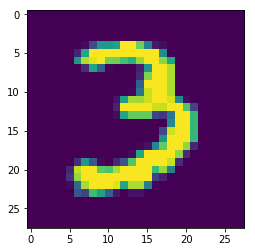

In [14]:
plt.imshow((features[:, 9]).reshape((28, 28)));

# use the function to generate the train_dev split
-------------------------------------------------------------------------------------------------------------------
link -> https://github.com/akanimax/machine-learning-helpers/blob/master/training/data_setup.py

In [15]:
# shuffle the data using a random permutation
perm = np.random.permutation(n_examples)
features = features[:, perm]
labels = labels[perm]

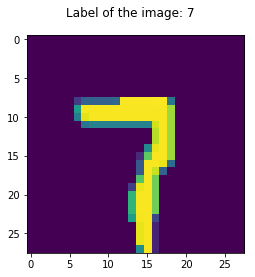

In [16]:
random_index = np.random.randint(n_examples)
random_image = features[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(labels[random_index]))
plt.imshow(random_image)

In [17]:
# function to split the data into train - dev sets:
def split_train_dev(X, Y, train_percentage):
    '''
        function to split the given data into two small datasets (train - dev)
        @param
        X, Y => the data to be split
        (** Make sure the train dimension is the first one)
        train_percentage => the percentage which should be in the training set.
        (**this should be in 100% not decimal)
        @return => train_X, train_Y, test_X, test_Y
    '''
    m_examples = len(X)
    assert train_percentage < 100, "Train percentage cannot be greater than 100! NOOB!"
    partition_point = int((m_examples * (float(train_percentage) / 100)) + 0.5) # 0.5 is added for rounding

    # construct the train_X, train_Y, test_X, test_Y sets:
    train_X = X[: partition_point]; train_Y = Y[: partition_point]
    test_X  = X[partition_point: ]; test_Y  = Y[partition_point: ]

    assert len(train_X) + len(test_X) == m_examples, "Something wrong in X splitting"
    assert len(train_Y) + len(test_Y) == m_examples, "Something wrong in Y splitting"

    # return the constructed sets

    return train_X, train_Y, test_X, test_Y

In [18]:
train_X, train_Y, test_X, test_Y = split_train_dev(features.T, labels, train_percentage)

In [19]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [20]:
train_X = train_X.T; test_X = test_X.T
train_X.shape, test_X.shape

((784, 39900), (784, 2100))

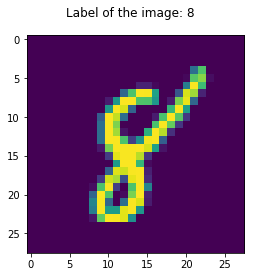

In [21]:
# check by plotting some image
random_index = np.random.randint(train_X.shape[-1])
random_image = train_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(train_Y[random_index]))
plt.imshow(random_image)

# Point to reset from here onwards: 

In [22]:
# defining the Tensorflow graph for this task:
tf.reset_default_graph() # reset the graph here:

In [23]:
# define the placeholders:
tf_input_pixels = tf.placeholder(tf.float32, shape=(n_features, None))
tf_integer_labels = tf.placeholder(tf.int32, shape=(None,))

In [24]:
# image shaped pixels for the input_pixels:
tf_input_images = tf.reshape(tf.transpose(tf_input_pixels), shape=(-1, 28, 28, 1))
input_image_summary = tf.summary.image("input_image", tf_input_images)

In [25]:
# define the one hot encoded version fo the integer_labels
tf_one_hot_encoded_labels = tf.one_hot(tf_integer_labels, depth=num_classes, axis=0)
tf_one_hot_encoded_labels

<tf.Tensor 'one_hot:0' shape=(10, ?) dtype=float32>

In [26]:
# define the layer 0 biases:
lay_0_b = tf.get_variable("layer_0_biases", shape=(n_features, 1), initializer=tf.zeros_initializer())


# layer 1 weights 
lay_1_W = tf.get_variable("layer_1_weights", shape=(hidden_neurons, n_features), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_1_b = tf.get_variable("layer_1_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 2 weights
lay_2_W = tf.get_variable("layer_2_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_2_b = tf.get_variable("layer_2_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 3 weights
lay_3_W = tf.get_variable("layer_3_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_3_b = tf.get_variable("layer_3_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 4 weights
lay_4_W = tf.get_variable("layer_4_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_4_b = tf.get_variable("layer_4_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 5 weights
lay_5_W = tf.get_variable("layer_5_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_5_b = tf.get_variable("layer_5_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 6 weights
lay_6_W = tf.get_variable("layer_6_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_6_b = tf.get_variable("layer_6_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 7 weights
lay_7_W = tf.get_variable("layer_7_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_7_b = tf.get_variable("layer_7_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 8 weights
lay_8_W = tf.get_variable("layer_8_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_8_b = tf.get_variable("layer_8_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 9 weights
lay_9_W = tf.get_variable("layer_9_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_9_b = tf.get_variable("layer_9_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 10 weights
lay_10_W = tf.get_variable("layer_10_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_10_b = tf.get_variable("layer_10_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 11 weights
lay_11_W = tf.get_variable("layer_11_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_11_b = tf.get_variable("layer_11_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 12 weights
lay_12_W = tf.get_variable("layer_12_weights", shape=(num_classes, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_12_b = tf.get_variable("layer_12_biases", shape=(num_classes, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# define the forward computation:

In [27]:
# forward computation:
z1 = tf.matmul(lay_1_W, tf_input_pixels) + lay_1_b
a1 = tf.abs(z1)

z2 = tf.matmul(lay_2_W, a1) + lay_2_b
a2 = tf.abs(z2)

z3 = tf.matmul(lay_3_W, a2) + lay_3_b
a3 = tf.abs(z3) 

z4 = tf.matmul(lay_4_W, a3) + lay_4_b
a4 = tf.abs(z4) 

z5 = tf.matmul(lay_5_W, a4) + lay_5_b
a5 = tf.abs(z5) 

z6 = tf.matmul(lay_6_W, a5) + lay_6_b
a6 = tf.abs(z6)

z7 = tf.matmul(lay_7_W, a6) + lay_7_b
a7 = tf.abs(z7)

z8 = tf.matmul(lay_8_W, a7) + lay_8_b
a8 = tf.abs(z8)

z9 = tf.matmul(lay_9_W, a8) + lay_9_b
a9 = tf.abs(z9)

z10 = tf.matmul(lay_10_W, a9) + lay_10_b
a10 = tf.abs(z10)

z11 = tf.matmul(lay_11_W, a10) + lay_11_b
a11 = tf.abs(z11)

z12 = tf.matmul(lay_12_W, a11) + lay_12_b
a12 = tf.abs(z12)

# define the backward computation:

In [28]:
# in the backward computations, there are no actiavtion functions
y_in_back = a12

a1_back = tf.abs(tf.matmul(tf.transpose(lay_12_W), y_in_back) + lay_11_b)
a2_back = tf.abs(tf.matmul(tf.transpose(lay_11_W), a1_back) + lay_10_b)
a3_back = tf.abs(tf.matmul(tf.transpose(lay_10_W), a2_back) + lay_9_b)
a4_back = tf.abs(tf.matmul(tf.transpose(lay_9_W), a3_back) + lay_8_b)
a5_back = tf.abs(tf.matmul(tf.transpose(lay_8_W), a4_back) + lay_7_b)
a6_back = tf.abs(tf.matmul(tf.transpose(lay_7_W), a5_back) + lay_6_b)
a7_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), a6_back) + lay_5_b)
a8_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), a7_back) + lay_4_b)
a9_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), a8_back) + lay_3_b)
a10_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), a9_back) + lay_2_b)
a11_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), a10_back) + lay_1_b)
a12_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), a11_back) + lay_0_b)

In [29]:
y_in_back

<tf.Tensor 'Abs_11:0' shape=(10, ?) dtype=float32>

In [30]:
in_back_vector = tf.placeholder(tf.float32, shape=(num_classes, None))

In [31]:
# computations for obtaining predictions: 
pred1_back = tf.abs(tf.matmul(tf.transpose(lay_12_W), in_back_vector) + lay_11_b)
pred2_back = tf.abs(tf.matmul(tf.transpose(lay_11_W), pred1_back) + lay_10_b)
pred3_back = tf.abs(tf.matmul(tf.transpose(lay_10_W), pred2_back) + lay_9_b)
pred4_back = tf.abs(tf.matmul(tf.transpose(lay_9_W), pred3_back) + lay_8_b)
pred5_back = tf.abs(tf.matmul(tf.transpose(lay_8_W), pred4_back) + lay_7_b)
pred6_back = tf.abs(tf.matmul(tf.transpose(lay_7_W), pred5_back) + lay_6_b)
pred7_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), pred6_back) + lay_5_b)
pred8_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), pred7_back) + lay_4_b)
pred9_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), pred8_back) + lay_3_b)
pred10_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), pred9_back) + lay_2_b)
pred11_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), pred10_back) + lay_1_b)
pred12_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), pred11_back) + lay_0_b)

# generated digits:
generated_digits = pred12_back

In [32]:
x_out_back = a12_back
x_out_back, tf_input_pixels

(<tf.Tensor 'Abs_23:0' shape=(784, ?) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>)

In [33]:
x_out_back_image = tf.reshape(tf.transpose(x_out_back), shape=(-1, 28, 28, 1))
output_image_summary = tf.summary.image("output_image", x_out_back_image)

In [34]:
y_in_back

<tf.Tensor 'Abs_11:0' shape=(10, ?) dtype=float32>

# Now compute the forward cost

In [35]:
def normalize(x):
    '''
        function to range normalize the given input tensor
        @param 
        x => the input tensor to be range normalized
        @return => range normalized tensor
    '''
    sqrs = tf.square(x)
    x_mag = tf.sqrt(tf.reduce_sum(sqrs, axis=0, keep_dims=True))
    # return the range normalized prediction values:
    return (x / x_mag)

In [36]:
# forward cost 
fwd_cost = tf.reduce_mean(tf.abs(normalize(y_in_back) - tf_one_hot_encoded_labels))
fwd_cost_summary = tf.summary.scalar("Forward_cost", fwd_cost)

# Now compute the backward cost

In [37]:
# backward cost 
# The backward cost is the mean squared error function
bwd_cost = tf.reduce_mean(tf.abs(x_out_back - tf_input_pixels))
bwd_cost_summary = tf.summary.scalar("Backward_cost", bwd_cost)

# The final cost is the addition of both forward and the backward costs 

In [38]:
cost = fwd_cost + bwd_cost
final_cost_summary = tf.summary.scalar("Final_cost", cost)

In [39]:
# define an optimizer for this task
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)
init = tf.global_variables_initializer()
all_summaries = tf.summary.merge_all()

In [40]:
n_train_examples = train_X.shape[-1]

In [41]:
sess = tf.InteractiveSession()

In [42]:
tensorboard_writer = tf.summary.FileWriter(model_path_name, graph=sess.graph, filename_suffix=".bot")

In [43]:
sess.run(init)

In [44]:
# start training the network for num_iterations and using the batch_size
global_step = 0
for epoch in range(no_of_epochs):
    global_index = 0; costs = [] # start with empty list
    while(global_index < n_train_examples):
        start = global_index; end = start + batch_size
        train_X_minibatch = train_X[:, start: end]
        train_Y_minibatch = train_Y.astype(np.int32)[start: end]

        iteration = global_index / batch_size
        
        # run the computation:
        _, loss = sess.run((optimizer, cost), feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})

        # add the cost to the cost list
        costs.append(loss)

        if(iteration % 100 == 0):
            sums = sess.run(all_summaries, feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})
            
            print "Iteration: " + str(global_step) + " Cost: " + str(loss)

            tensorboard_writer.add_summary(sums, global_step = global_step)
        
        # increment the global index 
        global_index = global_index + batch_size
    
        global_step += 1
        
    # print the average epoch cost:
    print "epoch no: " + str(epoch + 1)
    print "Average epoch cost: " + str(sum(costs) / len(costs))
        

Iteration: 0 Cost: 44.235
Iteration: 100 Cost: 33.3513
Iteration: 200 Cost: 34.5095
Iteration: 300 Cost: 31.815
Iteration: 400 Cost: 32.6158
Iteration: 500 Cost: 30.4053
Iteration: 600 Cost: 33.1326
epoch no: 1
Average epoch cost: 33.5398446811
Iteration: 624 Cost: 33.3701
Iteration: 724 Cost: 32.6056
Iteration: 824 Cost: 34.6617
Iteration: 924 Cost: 32.2532
Iteration: 1024 Cost: 31.7901
Iteration: 1124 Cost: 30.4964
Iteration: 1224 Cost: 33.3142
epoch no: 2
Average epoch cost: 32.78271923
Iteration: 1248 Cost: 33.0347
Iteration: 1348 Cost: 31.3608
Iteration: 1448 Cost: 33.4265
Iteration: 1548 Cost: 31.3995
Iteration: 1648 Cost: 32.6646
Iteration: 1748 Cost: 29.6437
Iteration: 1848 Cost: 32.8295
epoch no: 3
Average epoch cost: 32.6727665235
Iteration: 1872 Cost: 33.6283
Iteration: 1972 Cost: 31.8166
Iteration: 2072 Cost: 33.5157
Iteration: 2172 Cost: 31.193
Iteration: 2272 Cost: 32.6616
Iteration: 2372 Cost: 29.9695
Iteration: 2472 Cost: 32.6124
epoch no: 4
Average epoch cost: 32.72232

Iteration: 19944 Cost: 30.04
epoch no: 32
Average epoch cost: 30.4628185767
Iteration: 19968 Cost: 31.1525
Iteration: 20068 Cost: 29.6038
Iteration: 20168 Cost: 31.6672
Iteration: 20268 Cost: 29.8759
Iteration: 20368 Cost: 29.8044
Iteration: 20468 Cost: 28.3499
Iteration: 20568 Cost: 30.0102
epoch no: 33
Average epoch cost: 30.3756855787
Iteration: 20592 Cost: 31.2122
Iteration: 20692 Cost: 29.6015
Iteration: 20792 Cost: 31.5972
Iteration: 20892 Cost: 29.8218
Iteration: 20992 Cost: 29.7289
Iteration: 21092 Cost: 28.2955
Iteration: 21192 Cost: 29.8975
epoch no: 34
Average epoch cost: 30.3118484173
Iteration: 21216 Cost: 31.0809
Iteration: 21316 Cost: 29.5648
Iteration: 21416 Cost: 31.5527
Iteration: 21516 Cost: 29.7283
Iteration: 21616 Cost: 29.6932
Iteration: 21716 Cost: 28.2138
Iteration: 21816 Cost: 29.9234
epoch no: 35
Average epoch cost: 30.3053524066
Iteration: 21840 Cost: 31.0638
Iteration: 21940 Cost: 29.5496
Iteration: 22040 Cost: 31.5525
Iteration: 22140 Cost: 29.9392
Iteratio

KeyboardInterrupt: 

# Very Important: Save this trained model

In [ ]:
model_file_name = os.path.join(model_path_name, model_path_name.split("/")[-1])
model_file_name

In [ ]:
saver = tf.train.Saver()

In [ ]:
saver.save(sess, model_file_name, global_step=global_step)

# Model13 seems to be the most promising till now. It has (Mean absolute difference) function as the forward and the backward costs
-------------------------------------------------------------------------------------------------------------------
# Model2_v2 (currently being used), is same as Model13 but with the softmax function replaced by the range normalizer function for getting a probability distribution

# The following cell shows how the network final activations look like upon passing some of the test images that It has never seen before
-------------------------------------------------------------------------------------------------------------------
# Run the following cell multiple times to see the effect better

In [ ]:
saver.restore(sess, tf.train.latest_checkpoint(model_path_name))

In [ ]:
# check by plotting some image
random_index = np.random.randint(test_X.shape[-1])
random_image = test_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(test_Y[random_index]))
plt.imshow(random_image)

# generate the predictions for one random image from the test set.
predictions = np.squeeze(sess.run(y_in_back, feed_dict={tf_input_pixels: test_X[:, random_index].reshape((-1, 1))}))

plt.figure().suptitle("Predictions obtained from the network")
plt.plot(range(10), predictions);
print predictions
print "Predicted label: " + str(np.argmax(predictions))

# Calculate the accuracy of the network on the training and the test dataset

In [ ]:
tf_input_pixels, train_X.shape

In [ ]:
preds = sess.run(y_in_back, feed_dict={tf_input_pixels: train_X})

In [ ]:
correct = np.sum(np.argmax(preds, axis=0) == train_Y)
accuracy = (float(correct) / train_X.shape[-1]) * 100
print "Training accuracy: " + str(accuracy)

In [ ]:
print "No. of examples that the network got wrong: " + str(n_train_examples - correct)

# Error Analysis:

### The following cell saves all the incorrectly classified images into the specified directory.

In [ ]:
pred_labels = np.argmax(preds, axis=0)
for index in range(n_train_examples):
    # check if the predicted label is equal to the ideal label
    if(pred_labels[index] != train_Y[index]):
        image = train_X[:, index].reshape((28, 28))
        
        pred_label = str(pred_labels[index])
        orig_label = str(train_Y[index])
        
        # create a new image
        plt.figure(index).suptitle("predicted label: " + pred_label + " original label: " + orig_label)
        plt.subplot(211)
        plt.plot(preds[:, index])
        plt.subplot(212)
        plt.imshow(image)
        plt.savefig(os.path.join(error_analysis_path, str(index)))

# Calculate the test accuracy:

In [ ]:
test_preds = sess.run(y_in_back, feed_dict={tf_input_pixels: test_X})
test_correct = np.sum(np.argmax(test_preds, axis=0) == test_Y)
test_accuracy = (float(test_correct) / test_X.shape[-1]) * 100
print "Testing accuracy:" + str(test_accuracy)

# Now comes the best part! Can The network generate digits?
-------------------------------------------------------------------------------------------------------------------
# Let's generate some digits by tweaking the learned representation

In [ ]:
generator_array = np.array([2.42562220e-03,   6.63316175e-02,   5.14896587e-03,   5.55557422e-02,
   8.33549351e-03,   1.06856683e-02,   1.17659550e+01,   1.30331926e-02,
   1.42113212e-02,   1.96716078e-02]).reshape(-1, 1).astype(np.float32)
generator_array.dtype
generated_image = sess.run(generated_digits, feed_dict={in_back_vector: generator_array}).reshape((28, 28))
plt.imshow(generated_image)

# generate representations for different digits by walking along their respective axes

In [ ]:
total_frames = 80

In [ ]:
all_digits = [] # start with an empty list
for walking_axis in range(num_classes):
    reps = np.zeros(shape=(num_classes, total_frames))
    for cnt in range(total_frames):
        reps[walking_axis, cnt] = cnt
    all_digits.append(reps)

all_digits = np.hstack(all_digits)

In [ ]:
all_digits.shape

In [ ]:
# obtain the images for these inputs:
representations, images = sess.run((pred1_back, generated_digits), feed_dict={in_back_vector: all_digits})

In [ ]:
all_digits = all_digits.T
print all_digits.shape

In [ ]:
representations = representations.T
print representations.shape

In [ ]:
images = images.T.reshape((-1, 28, 28))
print images.shape

In [ ]:
imagelist = images

import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = u'/home/animesh/.linuxbrew/bin/ffmpeg'

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=1);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(images.shape[0]), 
                              interval=50, blit=True)

In [ ]:
in_list = all_digits

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
plt.ylim((0, 80))
in_plot,  = plt.plot(in_list[0]);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    in_plot.set_ydata(in_list[j])
    # return the artists set
    return [in_plot]
# kick off the animation
in_ani = animation.FuncAnimation(fig, updatefig, frames=range(all_digits.shape[0]), 
                              interval=50, blit=True)

In [ ]:
plotlist = representations

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
plt.ylim((0, 0.8))
plot,  = plt.plot(representations[0]);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    plot.set_ydata(representations[j])
    # return the artists set
    return [plot]
# kick off the animation
plot_ani = animation.FuncAnimation(fig, updatefig, frames=range(representations.shape[0]), 
                              interval=50, blit=True)

In [ ]:
print(animation.writers.list())

In [ ]:
HTML(in_ani.to_html5_video())

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
HTML(plot_ani.to_html5_video())

# The above activations' graph visualization proves that the network is not cheating by using half of the representations for encoding and half for decoding. The network has simultaneously stored weights that allows it to perform both the tasks in a unified manner.

# Hell Yeah! That's a victory! We can indeed generate digits using this neural network